In [1]:
import numpy as np
from bs4 import BeautifulSoup
from html.parser import HTMLParser
import requests
import json
import re
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [35]:
def extract_page_images(book_url, page):
    book_url = book_url + page
    book_html = requests.get(book_url).text
    soup = BeautifulSoup(book_html, 'html.parser')
    
    #ищем ссылки на картинки
    image_list = []
    img_atr_list = soup.findAll('img')
    
    # отбираем только те картинки, где изображена вещь без человека
    i = 0
    for img_atr in img_atr_list:
        link = img_atr['src']
        if  link[len(link)-4 :len(link)] == ".jpg" and link[0:15] == "https://storage"  and (img_atr['class'][0] + " " +  img_atr['class'][1]) != "img-fluid showback":
        
            #достаём картинку по запросу и переводим в ndarray uint8
            response = requests.get(link)
            img = Image.open(BytesIO(response.content))
            img = np.array(img)
            image_list.append(img)
            
    return image_list

In [22]:
#создаём список ссылок на одежду
clothes_list = ["https://www.vsemayki.ru/catalog/group/man_tshirts?page=", 
                "https://www.vsemayki.ru/catalog/group/man_hoodies?page="]
images = []

#проходимся по всем страницам с этими вещами
for clothes in clothes_list:
    for page in range(2, 5):
        images_of_page_list = extract_page_images(clothes, str(page))
        images+=images_of_page_list

Image shape: (250, 250, 3)
Amount of images: 240


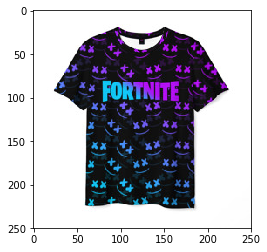

In [36]:
plt.imshow(images[11])
print("Image shape:", images[0].shape)
print("Amount of images:", len(images))